In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [157]:
df = pd.read_csv('housing.csv')
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

since, we have 81 columns, which is a lot, pandas is not able to show all of them, so we need to change the default settings of pandas 

In [159]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
# to reset to default, use
pd.reset_option('display.max_columns')

In [161]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Since we are learning to fill missing cols that are categorical so, first let's get all the categorical columns

In [163]:
categorical_cols = [cols for cols in df.columns if df[cols].nunique() < 10 and df[cols].dtype == 'object']

In [164]:
len(categorical_cols)

40

In [165]:
missing_categorical_cols = [cols for cols in categorical_cols if df[cols].isnull().sum() > 0 ]

In [166]:
missing_categorical_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<h5>Let's only select 'GarageQual' and 'FireplaceQu'</h5>

In [168]:
new_df = df[['GarageQual', 'FireplaceQu', 'SalePrice']]

In [169]:
new_df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


<p style='color: green; font-size: 20px'>Mode Imputation</p>

In [171]:
# percentage of missing values in each columns
new_df.isnull().mean() * 100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'No. of houses')

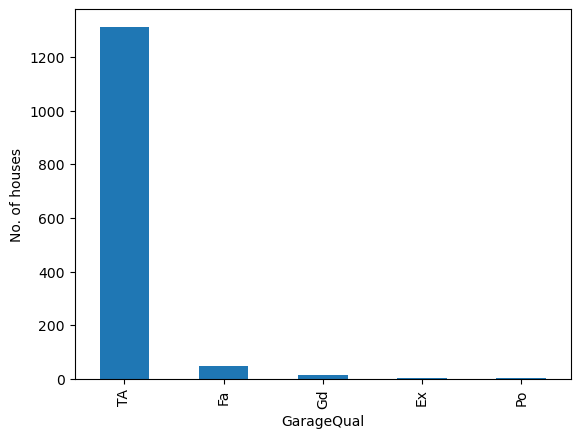

In [172]:
new_df['GarageQual'].value_counts().plot(kind='bar')
plt.ylabel("No. of houses")

In [173]:
new_df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

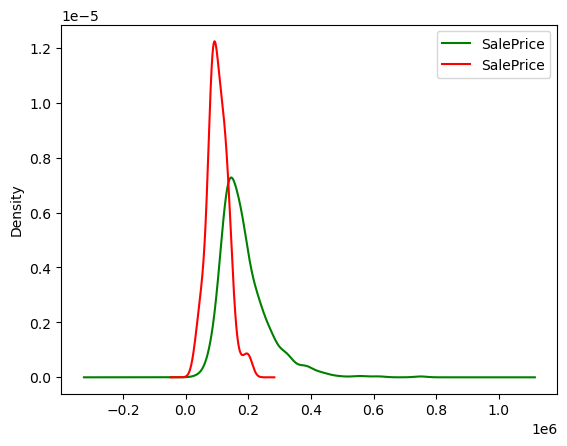

In [174]:
# EDA
fig = plt.figure()
ax = fig.add_subplot(111)

# plotting the corresponding value of SalePrice for 'TA' value in 'GarageQual'
new_df[(new_df['GarageQual']=='TA')]['SalePrice'].plot(kind='kde', ax=ax, color='green')

# plotting the corresponding value of SalePrice for 'NA' value in 'GarageQual'
new_df[(new_df['GarageQual'].isnull())]['SalePrice'].plot(kind='kde', color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [175]:
# storing the original count of 'TA' in a temp variable
temp = new_df[new_df['GarageQual'] == 'TA']

In [176]:
# filling in the missing values
new_df['GarageQual'].fillna('TA', inplace=True)

C:\Users\12368\AppData\Local\Temp\ipykernel_7300\2543771714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['GarageQual'].fillna('TA', inplace=True)
C:\Users\12368\AppData\Local\Temp\ipykernel_7300\2543771714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['GarageQual'].fillna('TA', inplace=True)


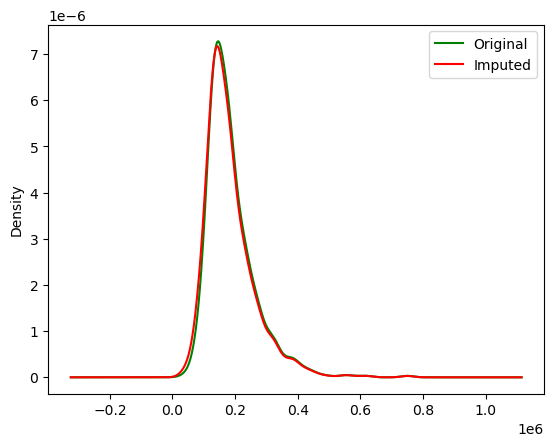

In [185]:
# plotting the above graph again to interpret changes
fig = plt.figure()
ax = fig.add_subplot(111)

# plotting the corresponding value of SalePrice for 'TA' value in 'GarageQual'
temp['SalePrice'].plot(kind='kde', ax=ax, color='green')

# plotting the corresponding value of SalePrice for 'NA' value in 'GarageQual'
new_df[(new_df['GarageQual']=='TA')]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputed']
ax.legend(lines, labels, loc='best')

plt.show()

Almost perfectly aligned. 

In [187]:
new_df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

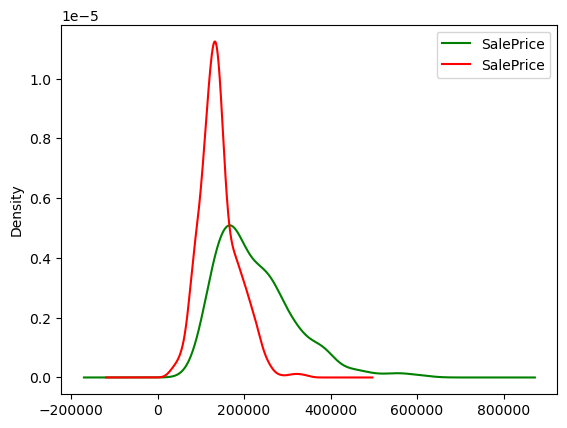

In [189]:
# EDA

fig = plt.figure()
ax = fig.add_subplot(111)

# plotting the corresponding value of SalePrice for 'TA' value in 'FireplaceQu'
new_df[(new_df['FireplaceQu']=='Gd')]['SalePrice'].plot(kind='kde', ax=ax, color='green')

# plotting the corresponding value of SalePrice for 'NA' value in 'FireplaceQu'
new_df[(new_df['FireplaceQu'].isnull())]['SalePrice'].plot(kind='kde', color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [191]:
temp2 = new_df[new_df['FireplaceQu'] == 'Gd']

In [193]:
new_df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\12368\AppData\Local\Temp\ipykernel_7300\3610041055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['FireplaceQu'].fillna('Gd', inplace=True)
C:\Users\12368\AppData\Local\Temp\ipykernel_7300\3610041055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FireplaceQu'].fillna('Gd', inplace=True)


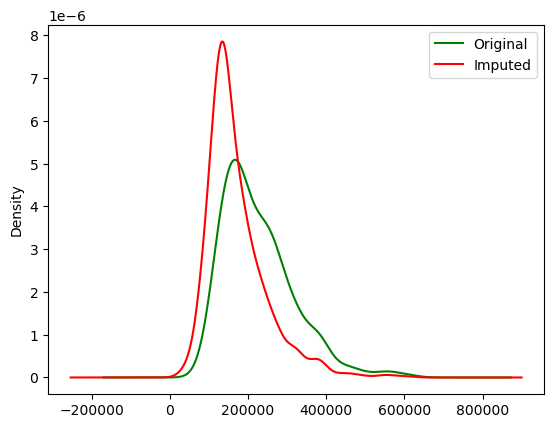

In [199]:
# EDA

fig = plt.figure()
ax = fig.add_subplot(111)

# plotting the corresponding value of SalePrice for 'TA' value in 'FireplaceQu'
temp2['SalePrice'].plot(kind='kde', ax=ax, color='green')

# plotting the corresponding value of SalePrice for 'NA' value in 'FireplaceQu'
new_df[(new_df['FireplaceQu']=='Gd')]['SalePrice'].plot(kind='kde', color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputed']
ax.legend(lines, labels, loc='best')

plt.show()

There is not much difference in kde because this columns had almost 50% of missing values in it.

<p></p>

<h5>As with numerical Imputer, we can also use scikit-learn's SimpleImputer for imputing categorical values</h5>

In [213]:
# Determine the target and label features
y = new_df['SalePrice']
X = new_df.drop(['SalePrice'], axis=1)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_transformed = imputer.fit_transform(X_train)
X_test_transformed = imputer.transform(X_test)

In [225]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)

<p style='color: purple; font-size: 20; font-family: sans-serif'>Now, this imputation technique works well when your missing data is <5% of the overall data which is also proven by 'GarageQual'. But what if the missing data > 10% ?? In such case, we can create our own category called 'missing' and use it to impute missing values.</p>

In [238]:
df['FireplaceQu'].isnull().mean()*100

47.26027397260274

<Axes: xlabel='FireplaceQu'>

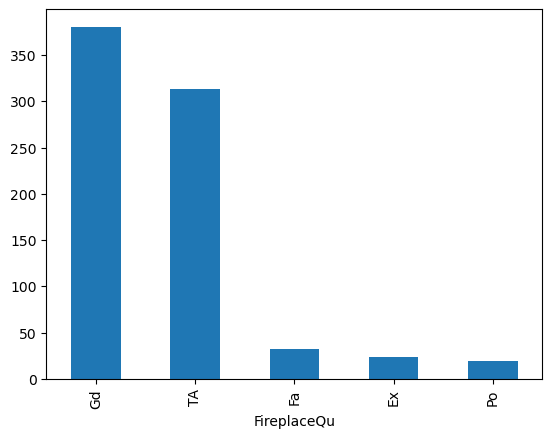

In [246]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [252]:
df['FireplaceQu'].fillna('missing', inplace=True)

<Axes: xlabel='FireplaceQu'>

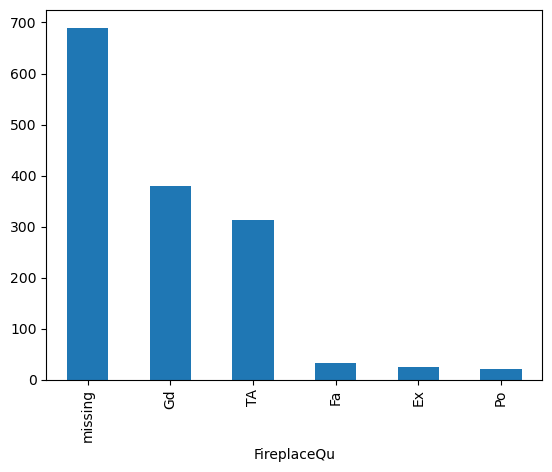

In [254]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
# using sklearn, we can do samething b
# si = SimpleImputer(strategy='constant', fill_value='missing')